In [ ]:
#This Jupyter notebook compares the accuracies of the various machine learning models used. The model that gives the 
#highest accuracy and precison is selected.


In [1]:
import numpy as np
import re
import nltk
#from sklearn.datasets import load_files
#nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.discriminant_analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn.discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.svm import SVC
import warnings

In [2]:
df= pd.read_csv("data.csv")
df['label'] = df['Text Label'].map({'Non-Bullying': 0, 'Bullying': 1})
df['message']=df['Tweet']
df.drop(['Text Label','Tweet'],axis=1,inplace=True)
X = df['message']
y = df['label']


In [3]:
print(X.head())
# Extract Feature With CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


0    yeah I got 2 backups for all that. I just hate...
1    I hate using my BB  but love my iPhone. Haven'...
2                               Get fucking real dude.
3     She is as dirty as they come  and that crook ...
4     why did you fuck it up. I could do it all day...
Name: message, dtype: object


In [4]:
LogisticR = LogisticRegression()
LogisticR.fit(X_train, y_train) 
y_pred = LogisticR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
LR = accuracy_score(y_test, y_pred)

C:\Users\Rashi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[1942  340]
 [ 668  471]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      2282
           1       0.58      0.41      0.48      1139

    accuracy                           0.71      3421
   macro avg       0.66      0.63      0.64      3421
weighted avg       0.69      0.71      0.69      3421

0.7053493130663548


In [5]:
RandomForest = RandomForestClassifier(n_estimators=1000, random_state=0)
RandomForest.fit(X_train, y_train) 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
RF = accuracy_score(y_test, y_pred)

[[1942  340]
 [ 668  471]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      2282
           1       0.58      0.41      0.48      1139

    accuracy                           0.71      3421
   macro avg       0.66      0.63      0.64      3421
weighted avg       0.69      0.71      0.69      3421

0.7053493130663548


In [6]:
AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoost.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = AdaBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
AB= accuracy_score(y_test, y_pred)

[[1977  305]
 [ 713  426]]
              precision    recall  f1-score   support

           0       0.73      0.87      0.80      2282
           1       0.58      0.37      0.46      1139

    accuracy                           0.70      3421
   macro avg       0.66      0.62      0.63      3421
weighted avg       0.68      0.70      0.68      3421

0.7024261911721719


In [7]:
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
SGD.fit(X_train, y_train)
SGDClassifier(max_iter=5)
y_pred = SGD.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
SGDA = accuracy_score(y_test, y_pred)

[[1791  491]
 [ 637  502]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2282
           1       0.51      0.44      0.47      1139

    accuracy                           0.67      3421
   macro avg       0.62      0.61      0.62      3421
weighted avg       0.66      0.67      0.66      3421

0.670271850336159


C:\Users\Rashi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [8]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
KNNA = accuracy_score(y_test, y_pred)

[[1154 1128]
 [ 396  743]]
              precision    recall  f1-score   support

           0       0.74      0.51      0.60      2282
           1       0.40      0.65      0.49      1139

    accuracy                           0.55      3421
   macro avg       0.57      0.58      0.55      3421
weighted avg       0.63      0.55      0.57      3421

0.5545162233265127


In [9]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
DT = accuracy_score(y_test, y_pred)

[[1710  572]
 [ 611  528]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      2282
           1       0.48      0.46      0.47      1139

    accuracy                           0.65      3421
   macro avg       0.61      0.61      0.61      3421
weighted avg       0.65      0.65      0.65      3421

0.6541946799181526


In [10]:
MultinomialNB = MultinomialNB()
MultinomialNB.fit(X_train, y_train)
y_pred = MultinomialNB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
MNB = accuracy_score(y_test, y_pred)

[[2094  188]
 [ 925  214]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      2282
           1       0.53      0.19      0.28      1139

    accuracy                           0.67      3421
   macro avg       0.61      0.55      0.53      3421
weighted avg       0.64      0.67      0.62      3421

0.6746565331774335


In [11]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
warnings.simplefilter("ignore")

print(ensemble)
ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E= accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion...
                                        

In [12]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
estimators.append(('sgd', model4))

warnings.simplefilter("ignore")
# create the ensemble model
ensemble2 = VotingClassifier(estimators)

print(ensemble2)

ensemble2.fit(X_train, y_train)

y_pred = ensemble2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E2 = accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion...
                                        

In [13]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model4 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
estimators.append(('sgd', model4))
warnings.simplefilter("ignore")


# create the ensemble model
ensemble3 = VotingClassifier(estimators)

print(ensemble3)

ensemble3.fit(X_train, y_train)

y_pred = ensemble3.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E3 = accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion...
                                        

In [14]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
warnings.simplefilter("ignore")

# create the ensemble model
ensemble4 = VotingClassifier(estimators)

print(ensemble4)

ensemble4.fit(X_train, y_train)

y_pred = ensemble4.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E4 = accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_dep...
                                        

In [15]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = RandomForestClassifier()
estimators.append(('rf', model3))
model4 = SVC()
estimators.append(('svm', model4))
#model4 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
#estimators.append(('sgd', model4))

warnings.simplefilter("ignore")
# create the ensemble model
ensemble5 = VotingClassifier(estimators)

print(ensemble5)

ensemble5.fit(X_train, y_train)

y_pred = ensemble5.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E5 = accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_dep...
                                        

In [16]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = RandomForestClassifier()
estimators.append(('rf', model3))
model4 = SVC()
estimators.append(('svm', model4))
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
estimators.append(('sgd', model5))

warnings.simplefilter("ignore")
# create the ensemble model
ensemble6 = VotingClassifier(estimators)

print(ensemble6)

ensemble6.fit(X_train, y_train)

y_pred = ensemble6.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E6 = accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_dep...
                                        

In [17]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = RandomForestClassifier()
estimators.append(('rf', model3))
model4 = SVC()
estimators.append(('svm', model4))
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
estimators.append(('sgd', model5))
model6 = AdaBoostClassifier(n_estimators=100, random_state=0)
estimators.append(('ada', model6))

warnings.simplefilter("ignore")
# create the ensemble model
ensemble7 = VotingClassifier(estimators)

print(ensemble7)

ensemble7.fit(X_train, y_train)

y_pred = ensemble7.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E7 = accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_dep...
                                        

In [18]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = RandomForestClassifier()
estimators.append(('rf', model3))
model4 = SVC()
estimators.append(('svm', model4))
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
estimators.append(('sgd', model5))
model6 = AdaBoostClassifier(n_estimators=100, random_state=0)
estimators.append(('ada', model6))
model7 = KNeighborsClassifier(n_neighbors=3)
estimators.append(('knn', model7))

warnings.simplefilter("ignore")
# create the ensemble model
ensemble8 = VotingClassifier(estimators)

print(ensemble8)

ensemble8.fit(X_train, y_train)

y_pred = ensemble8.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

E8 = accuracy_score(y_test, y_pred)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_dep...
                                        

In [19]:
accuracies = [LR, RF, AB, SGDA, KNNA, DT, MNB, E, E2, E3, E4, E5, E6, E7, E8]


In [20]:
for i in range(0, len(accuracies)):
    accuracies[i] = accuracies[i]*100 

In [21]:
accuracies

[70.53493130663549,
 70.53493130663549,
 70.24261911721719,
 67.0271850336159,
 55.451622332651276,
 65.41946799181527,
 67.46565331774335,
 72.37649809997076,
 72.87342882198188,
 71.44109909383222,
 72.34726688102894,
 72.46419175679625,
 72.58111663256358,
 73.01958491669103,
 72.17187956737796]

In [22]:
models = ['LogitR' , 'RF', 'AdaB', 'SGDA', 'KNN', 'DT', 'MNB', 'E', 'E2','E3', 'E4', 'E5', 'E6', 'E7', 'E8']

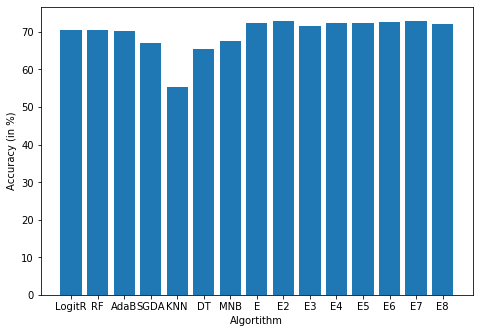

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models,accuracies)
plt.xlabel("Algortithm")
plt.ylabel("Accuracy (in %)")
plt.show()